Instructions:
  * Load and explore the dataset. (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
)
  * Perform necessary data preprocessing (if required).
  * Implement k-Means Clustering.
  * Implement Hierarchical Clustering.
  * Visualize the clustering results.
  * Compare the performance of the clustering techniques.
  * Provide a conclusion based on your findings.


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


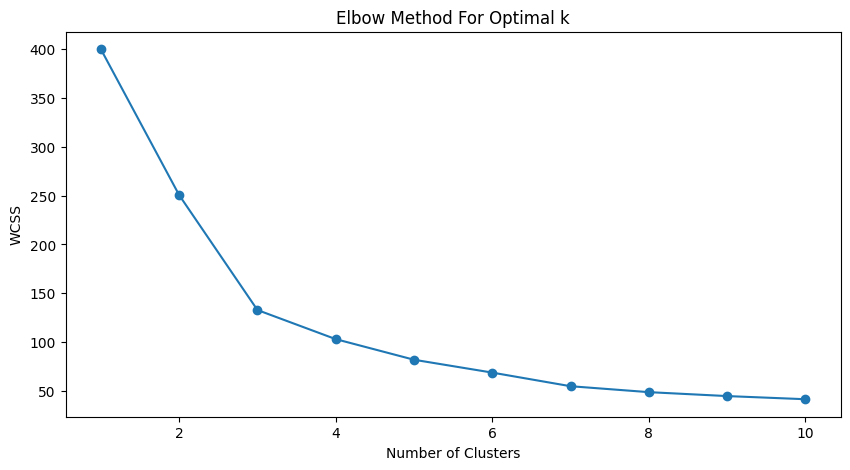

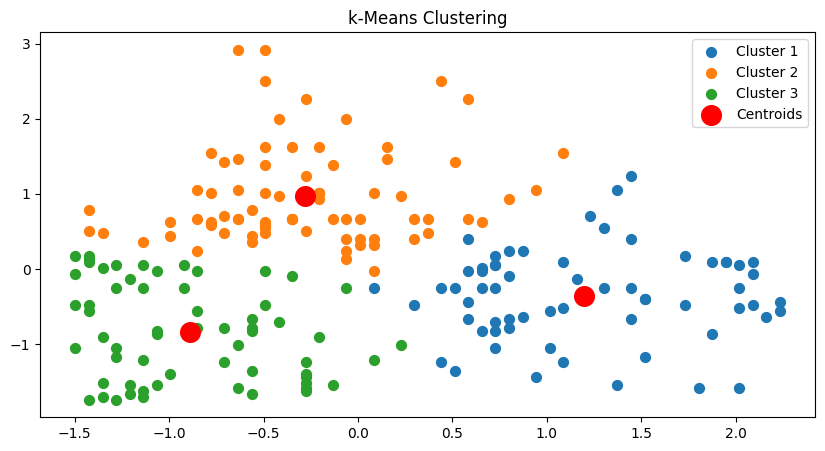

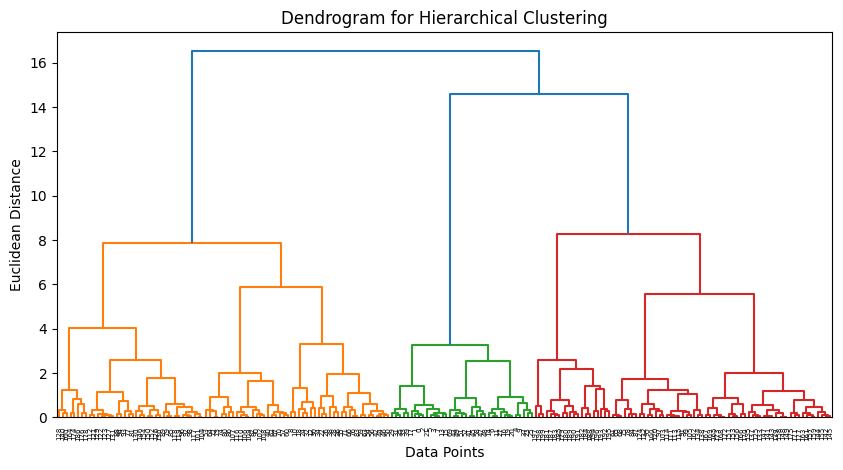

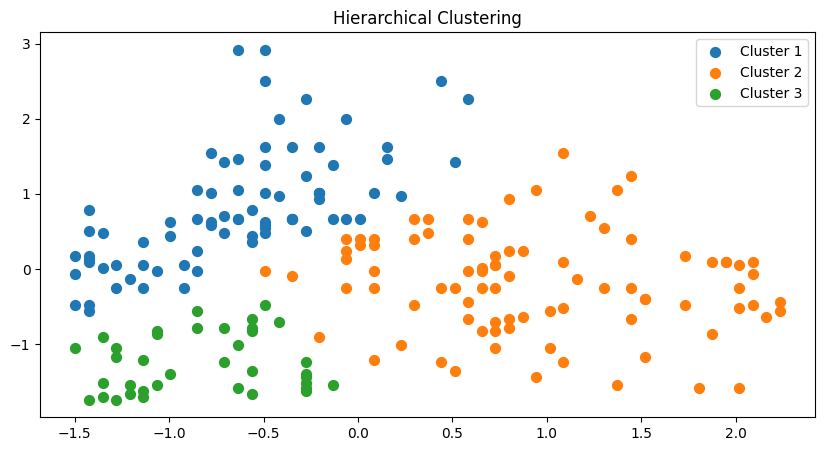

Silhouette Score for k-Means: 0.4438
Silhouette Score for Hierarchical Clustering: 0.3922


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
# PLEASE code here...[1]...
Mall_cust = 'Mall_Customers.csv'
df = pd.read_csv(Mall_cust)
print(df.head())

# Show the column names
# PLEASE code here...[2]...
print(df.columns)

# Data Preprocessing (if necessary)
# Selecting relevant features for clustering
X = df.iloc[:, [2, 3]].values  # Adjust column indices as required

# Feature Scaling and transform the form with StandardScaler
# PLEASE code here...[3]...
scaler = StandardScaler()
# PLEASE code here...[4]...
X_scaled = scaler.fit_transform(X)


# ========================================
# 1. K-Means Clustering
# ========================================

# Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Training K-Means Model with the optimal number of clusters
# PLEASE code here...[5]... training K-Means and set cluster to 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
# PLEASE code here...[6]... call model for fitting and predict to y_kmeans
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing K-Means Clustering
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('k-Means Clustering')
plt.legend()
plt.show()


# ========================================
# 2. Hierarchical Clustering
# ========================================

# Generating the linkage matrix for Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Plotting Dendrogram
# PLEASE code here...[7-12]...
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Fitting Hierarchical Clustering model
# PLEASE code here...[13]... training AgglomerativeClustering and set cluster to 3
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
# PLEASE code here...[14]... call model for fitting and predict to y_hc
y_hc = hc.fit_predict(X_scaled)

# Visualizing Hierarchical Clustering
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=50, label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=50, label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=50, label='Cluster 3')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()


# ========================================
# 3. Comparing Performance
# ========================================

# Calculate Silhouette Score for each model
kmeans_silhouette = silhouette_score(X_scaled, y_kmeans)
hierarchical_silhouette = silhouette_score(X_scaled, y_hc)

print(f'Silhouette Score for k-Means: {kmeans_silhouette:.4f}')
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.4f}')
